Adding all necessary packages

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

#import tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalsePositives, FalseNegatives

Make sure you have your kaggle.json in ~/.kaggle folder

In [3]:
# Downloading the data to the Google Colab

import zipfile
import os

# Coping the kaggle API to the Google Colab
# os.environ['KAGGLE_CONFIG_DIR'] = path_API_autentification_token

# Downloading the data
!poetry run kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
# or
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
# or
# !python -m kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzziping the data and storing into /tmp
zip_ref = zipfile.ZipFile('chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other




  0%|          | 0.00/2.29G [00:00<?, ?B/s]
  0%|          | 1.00M/2.29G [00:00<05:28, 7.49MB/s]
  0%|          | 4.00M/2.29G [00:00<02:28, 16.5MB/s]
  0%|          | 6.00M/2.29G [00:00<02:18, 17.8MB/s]
  0%|          | 9.00M/2.29G [00:00<02:07, 19.3MB/s]
  1%|          | 12.0M/2.29G [00:00<02:02, 20.0MB/s]
  1%|          | 15.0M/2.29G [00:00<01:57, 20.8MB/s]
  1%|          | 17.0M/2.29G [00:00<01:59, 20.5MB/s]
  1%|          | 20.0M/2.29G [00:01<01:53, 21.5MB/s]
  1%|          | 23.0M/2.29G [00:01<02:07, 19.1MB/s]
  1%|1         | 26.0M/2.29G [00:01<01:59, 20.4MB/s]
  1%|1         | 29.0M/2.29G [00:01<01:58, 20.5MB/s]
  1%|1         | 32.0M/2.29G [00:01<01:51, 21.8MB/s]
  1%|1         | 35.0M/2.29G [00:01<01:56, 20.9MB/s]
  2%|1         | 38.0M/2.29G [00:01<01:47, 22.6MB/s]
  2%|1         | 41.0M/2.29G [00:02<01:39, 24.3MB/s]
  2%|1         | 44.0M/2.29G [00:02<01:55, 21.0MB/s]
  2%|2         | 47.0M/2.29G [00:02<01:53, 21.2MB/s]
  2%|2         | 50.0M/2.29G [00:02<02:06, 19.0MB/s]
 

Fix the distribution of the validation set. Currently there are only 16 images in the validation set. We will combine everything and then split it again.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import shutil
import random

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/tmp/chest_xray/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset_path= '/tmp/chest_xray/'
new_dataset_path = '/tmp/chest_xray_new/'
if not os.path.exists(new_dataset_path):
   for split in ['train', 'val', 'test']:
       for cls in ['NORMAL', 'PNEUMONIA']:
           os.makedirs(f'{new_dataset_path}/{split}/{cls}', exist_ok=True)

   for cls in ['NORMAL', 'PNEUMONIA']:
       all_files = []
       for split in ['train', 'val', 'test']:
           source_folder = f'{dataset_path}/{split}/{cls}'
           files = os.listdir(source_folder)
           all_files.extend([(file, source_folder) for file in files])

       random.shuffle(all_files)

       train_files = all_files[:int(len(all_files)*0.8)]
       val_files = all_files[int(len(all_files)*0.8):int(len(all_files)*0.9)]
       test_files = all_files[int(len(all_files)*0.9):]

       for file, source_folder in train_files:
           dest = f'{new_dataset_path}/train/{cls}/{file}'
           shutil.copy(f'{source_folder}/{file}', dest)

       for file, source_folder in val_files:
           dest = f'{new_dataset_path}/val/{cls}/{file}'
           shutil.copy(f'{source_folder}/{file}', dest)

       for file, source_folder in test_files:
           dest = f'{new_dataset_path}/test/{cls}/{file}'
           shutil.copy(f'{source_folder}/{file}', dest) 

Splitting the data into train, validation and test sets

In [5]:
# Defining the paths of the directories that were unzipped
train_dir = '/tmp/chest_xray_new/train'
val_dir = '/tmp/chest_xray_new/val'
test_dir = '/tmp/chest_xray_new/test'

In [6]:
#Define image sizes
img_height = 128
img_width = 128
batch_size = 32

In [7]:
#import images into dataframes
train_df = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode = 'grayscale',
    image_size = (img_height,img_width),
    batch_size = batch_size
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    color_mode = 'grayscale',
    image_size = (img_height,img_width),
    batch_size = batch_size
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    color_mode = 'grayscale',
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 4684 files belonging to 2 classes.
Found 585 files belonging to 2 classes.
Found 587 files belonging to 2 classes.


Data inspection

In [8]:
train_labels = []
test_labels = []
val_labels = []

for images, labels in train_df.unbatch():
  train_labels.append(labels.numpy())

for images, labels in test_df.unbatch():
  test_labels.append(labels.numpy())

for images, labels in val_df.unbatch():
  val_labels.append(labels.numpy())



In [9]:
print("Count values of instances per label in train dataset\n")
print(pd.DataFrame(np.unique(train_labels, return_counts = True), index=['Label', 'count'], columns=['Normal','Pneumonia']))
print("\n\nCount values of instances per label in test dataset\n")
print(pd.DataFrame(np.unique(test_labels, return_counts = True), index=['Label', 'count'], columns=['Normal','Pneumonia']))
print("\n\nCount values of instances per label in validation dataset\n")
print(pd.DataFrame(np.unique(val_labels, return_counts = True), index=['Label', 'count'], columns=['Normal','Pneumonia']))

Count values of instances per label in train dataset

       Normal  Pneumonia
Label       0          1
count    1266       3418


Count values of instances per label in test dataset

       Normal  Pneumonia
Label       0          1
count     159        428


Count values of instances per label in validation dataset

       Normal  Pneumonia
Label       0          1
count     158        427


Image visualization

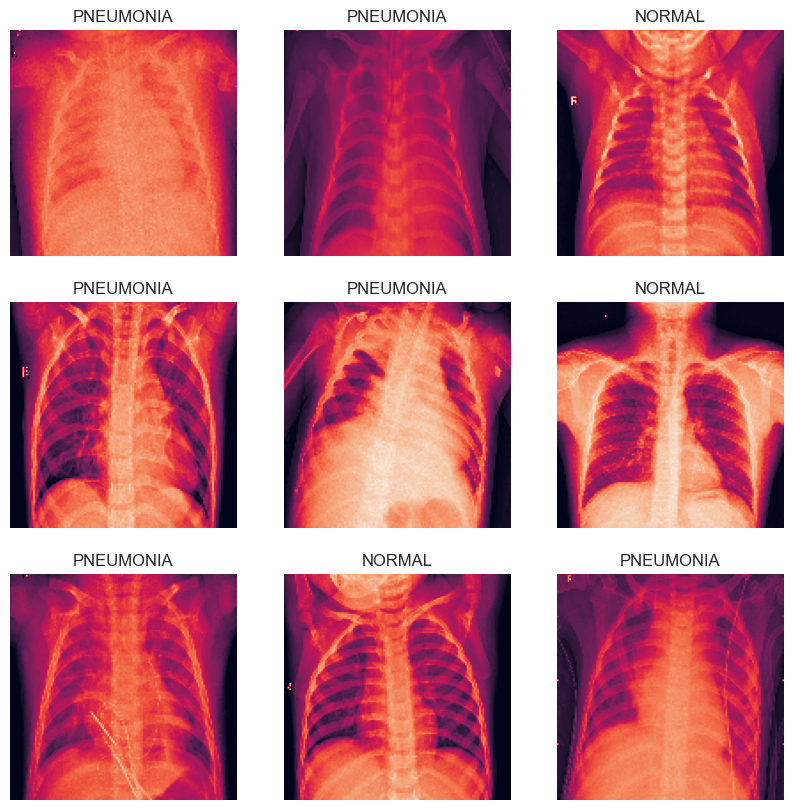

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_df.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(train_df.class_names[labels[i]])
        plt.axis("off")

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_df = train_df.cache().prefetch(buffer_size=AUTOTUNE)
val_df = val_df.cache().prefetch(buffer_size=AUTOTUNE)
test_df = test_df.cache().prefetch(buffer_size=AUTOTUNE)

Keras model

Model Validation

NameError: name 'history' is not defined

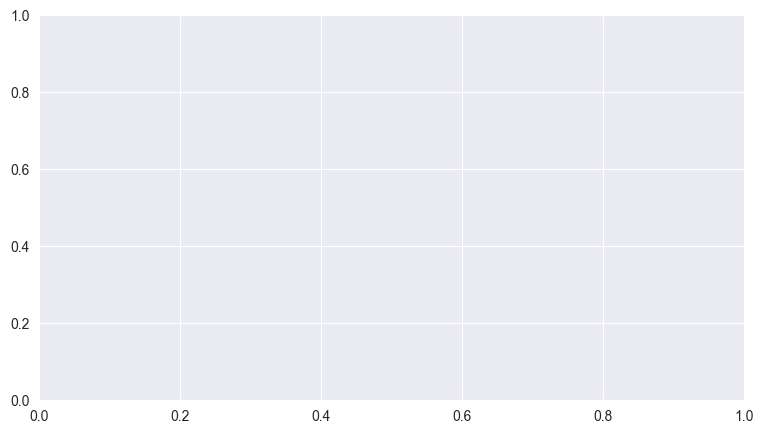

In [12]:
plt.figure(figsize=(20,5))

# ploting accuracy and validation accuracy
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='grey', label='Train Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Val Accuracy')
plt.title('Accuracy on train vs test')
plt.legend(loc='best')

# plotting loss and validation loss (sparse categorical crossentropy)
plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='grey', label='Train Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='red', label='Val Loss')
plt.title('Loss on train vs test')
plt.legend(loc='best')

plt.show()

In [ ]:
model.evaluate(test_df)